In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,skew

from scipy import stats

In [82]:
train_data=pd.read_csv('./input/train.csv')
test_data=pd.read_csv('./input/test.csv')

### 除了测试数据中没有价格这一项特征，其他的特征与训练数据中的特征名称一致。
    
    数据中的id这一项没有作用，这里我们将其删除

In [83]:
print("删除id前的训练数据的 shape：{}".format(train_data.shape))
print("删除id前测试数据的 shape：{}".format(test_data.shape))

train_data=train_data.drop('Id',axis=1)
test_data=test_data.drop('Id',axis=1)

print('\n')
print("删除id前的训练数据的 shape：{}".format(train_data.shape))
print("删除id前测试数据的 shape：{}".format(test_data.shape))


删除id前的训练数据的 shape：(1460, 81)
删除id前测试数据的 shape：(1459, 80)


删除id前的训练数据的 shape：(1460, 80)
删除id前测试数据的 shape：(1459, 79)


In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# 可视化价格分布

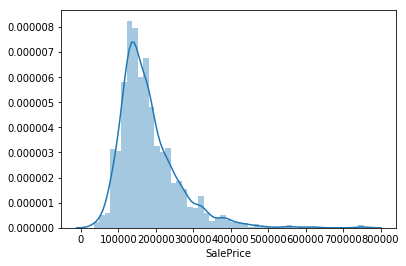

In [5]:
sns.distplot(train_data['SalePrice'])

## 查看数据的偏度和峰度
    
    偏度： 
    （1）Skewness = 0 ，分布形态与正态分布偏度相同。
    （2）Skewness > 0 ，正偏差数值较大，为正偏或右偏。长尾巴拖在右边，数据右端有较多的极端值。
    （3）Skewness < 0 ，负偏差数值较大，为负偏或左偏。长尾巴拖在左边，数据左端有较多的极端值。
    （4）数值的绝对值越大，表明数据分布越不对称，偏斜程度大。
    
    峰度：
    （1）Kurtosis=0 与正态分布的陡缓程度相同。
    （2）Kurtosis>0 比正态分布的高峰更加陡峭——尖顶峰
    （3）Kurtosis<0 比正态分布的高峰来得平缓——平顶峰

In [6]:
print("Skewness:%f"% train_data['SalePrice'].skew())
print("Kurtosis:%f"% train_data['SalePrice'].kurt())

Skewness:1.882876
Kurtosis:6.536282


### 我们先来看一下数据中我们觉得影响房价大的因素和房价之间的关系

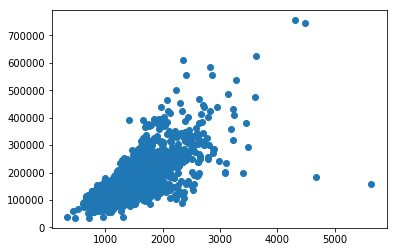

In [7]:
fig,ax=plt.subplots()
ax.scatter(x=train_data['GrLivArea'],y=train_data['SalePrice'])

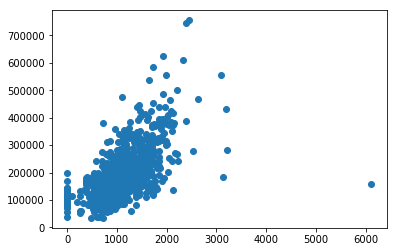

In [8]:
fig,ax=plt.subplots()
ax.scatter(x=train_data['TotalBsmtSF'],y=train_data['SalePrice'])

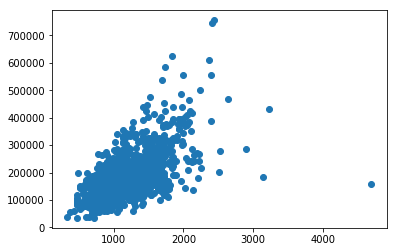

In [9]:
fig,ax=plt.subplots()
ax.scatter(x=train_data['1stFlrSF'],y=train_data['SalePrice'])

### 输出各个特征之间的相关性
    
    线性相关关系主要采用皮尔逊（Pearson）相关系数r来度量连续变量之间线性相关强度；
    r>0,线性正相关；r<0,线性负相关 随着一个特征的增大而减小；
    r=0,两个变量之间不存在线性关系，并不代表两个变量之间不存在任何关系。
    
    0<= |r|<0.3    低程度相关
    0.3<= |r|<0.8   中程度相关
    0.8<= |r|< 1   高程度相关


In [10]:
corrmat = train_data.corr()
corrmat

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


### 使用热力图查看各个特征之间的关系

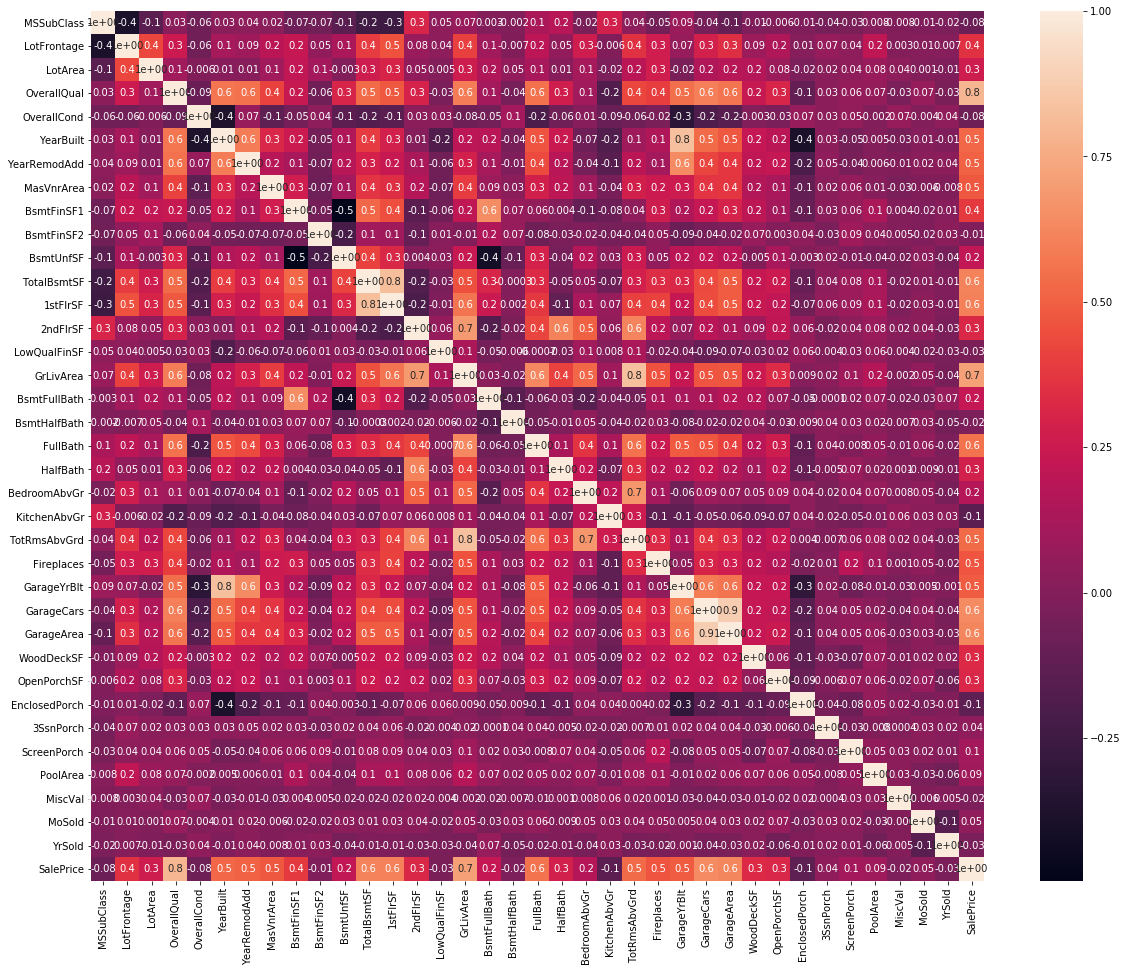

In [11]:
fig,ax=plt.subplots(figsize=(20,16))
sns.heatmap(corrmat,annot=True,fmt ='.1')
plt.show()

### 现在我们查看与SalePrice关系最密切的前十个特征
    
    通过 pd.nlargest(num，'特征')可以帮我们找到该特征系数最高的样本
    
    在np中可以通过 np.corrcoef 可以计算矩阵相关系数，在pd中可以通过corr()方法来实现
    
    以下两种可视化结果都可以进行一个矩阵相关系数的展示

In [22]:
top_ten=10
columns=corrmat.nlargest(top_ten,'SalePrice')['SalePrice'].index

In [33]:
# 使用np.corrcoef 计算矩阵相关系数，然后画图
# cm=np.corrcoef(train_data[columns].values.T)
# sns.set(font_scale=1.25)
# hm = sns.heatmap(cm, cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
# plt.show()

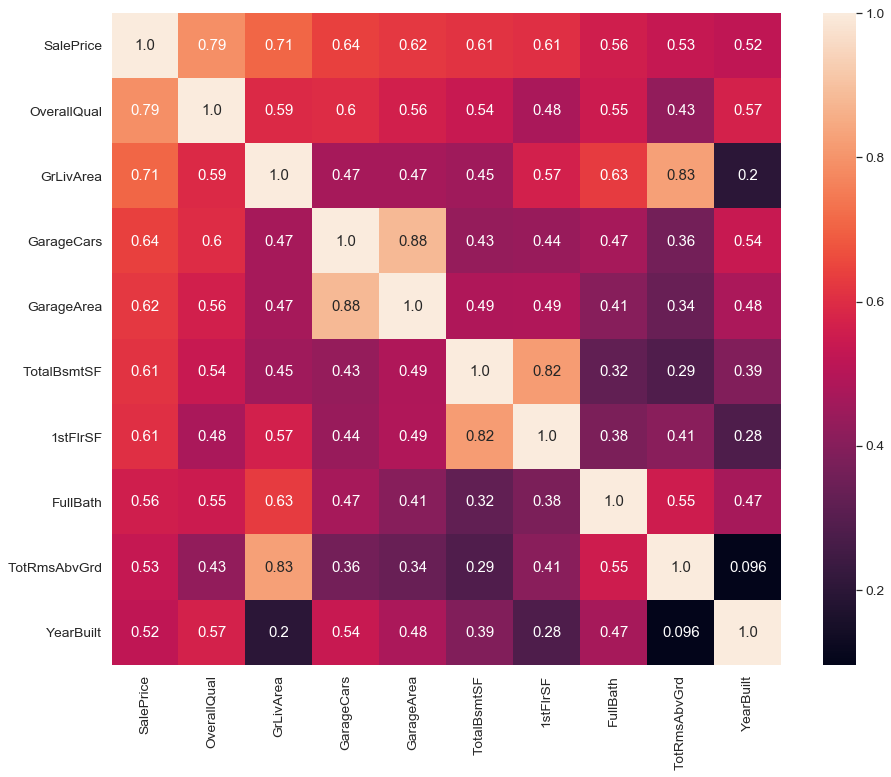

In [21]:
corrmat_ten=train_data[columns].corr()
fig,ax=plt.subplots(figsize=(15,12))
sns.heatmap(corrmat_ten,annot=True,fmt ='.2')
plt.show()

### 通过热力图我们知道了各个特征之间的相关系数，接下来我们使用散点图查看多个成对双变量的分布图
    
    在上面的热力图中我们可以观察到特征之间的相关系数，我们通过这些相关我们可以观察到 GrLivArea 和 GarageCars 之间的相关系数很高，我们可以选择分析其中的一个变量即可，看起来 GarageCars 和 SalePrice 之间的相关系数更高，所以我们保留 GarageCars，同理我们可以看出 GrLivArea 和 TotRmsAbvGrd 、 GrLivArea 和 TotRmsAbvGrd 之间的相关系数也很高，所以我们保留相关系数高的。

D:\python\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


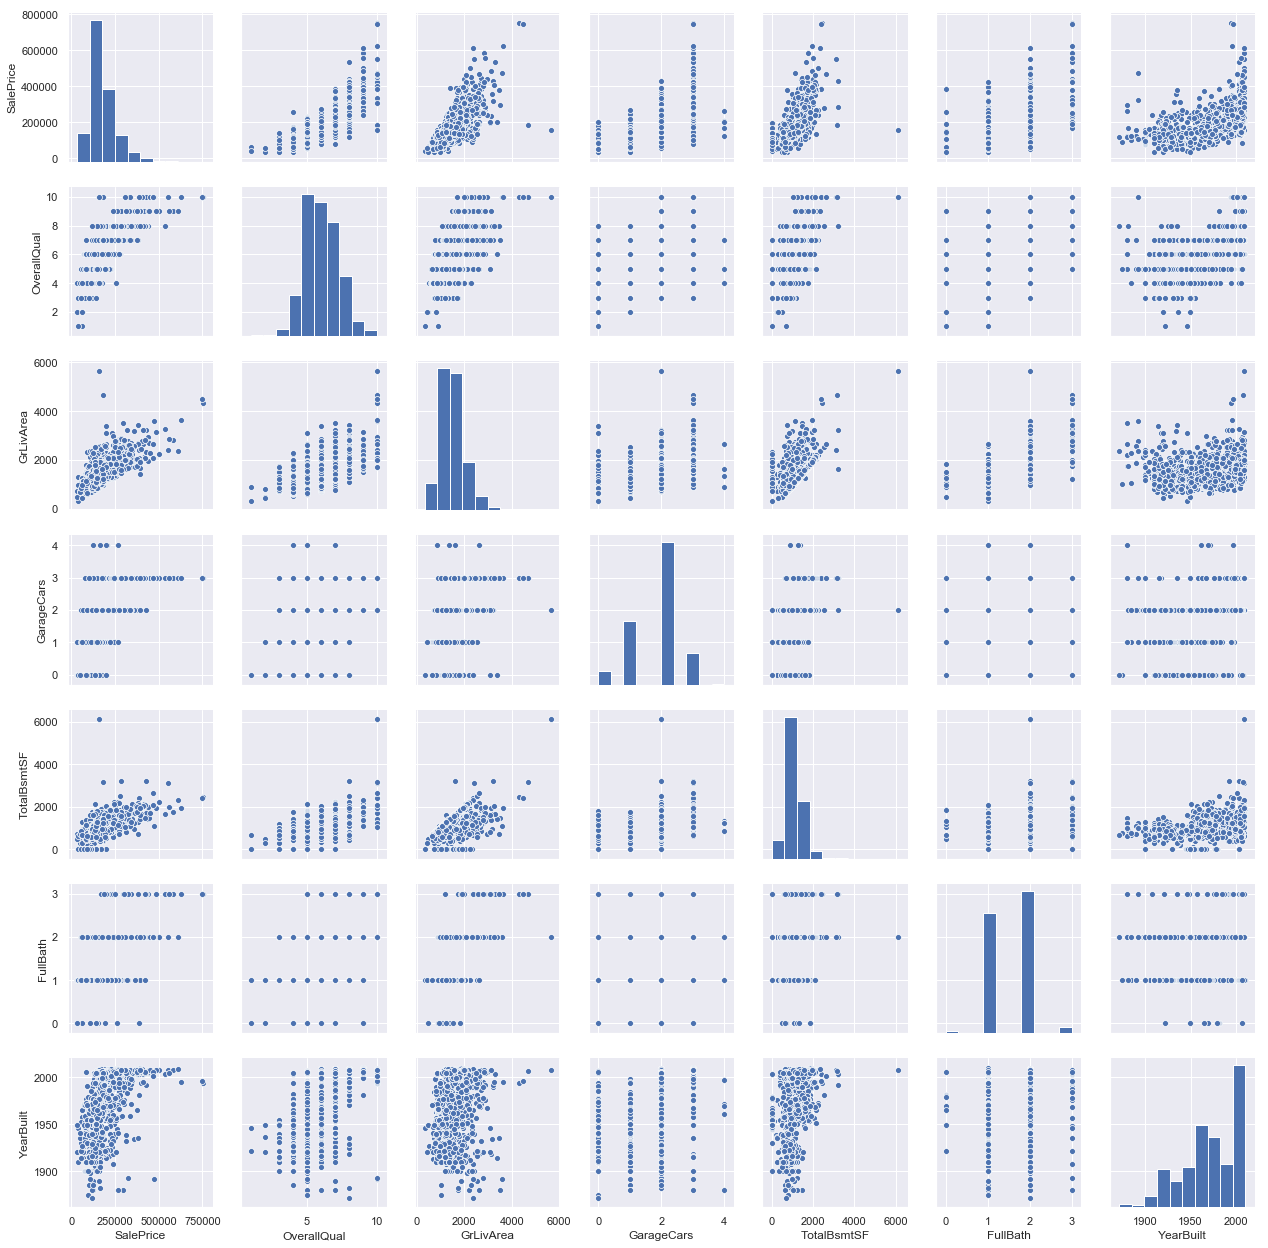

In [31]:
sns.set()
cols=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_data[cols],size=2.5)
plt.show()

### 我们可以看出来我们的特征和价格之间的关系是线性的 (自变量与因变量之间有线性关系。)
#### 由于（线性）模型喜欢正态分布的数据，我们需要转换此变量并使其更正常分布。

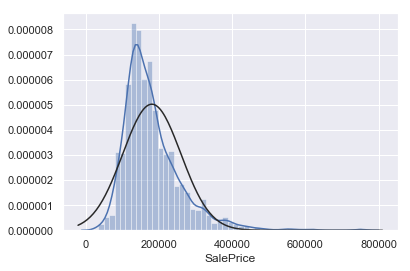

In [49]:
sns.distplot(train_data['SalePrice'],fit=norm)

#### 对数化可以使得数据趋向正太分布

In [63]:
train_data["SalePrice"] = np.log1p(train_data["SalePrice"])
(mu, sigma) = norm.fit(train_data['SalePrice'])

Text(0.5, 1.0, 'SalePrice distribution')

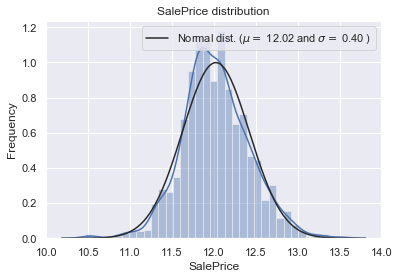

In [64]:
sns.distplot(train_data['SalePrice'],fit=norm)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#### 画QQ图
    它主要是直观的表示观测与预测值之间的差异。一般我们所取得数量性状数据都为正态分布数据。预测的线是一条从原点出发的45度角的虚线，事假观测值是实心点。

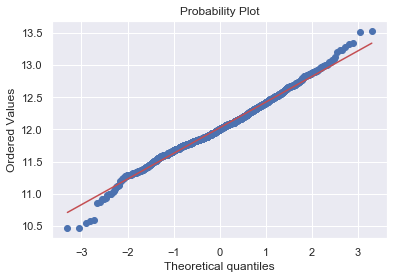

In [66]:
fig = plt.figure()
res = stats.probplot(train_data['SalePrice'],plot=plt)
plt.show()

### 接下来开始进行特征工程

#### 这里我们将我们的训练数据和测试数据进行一个整合

In [85]:
rtrain=train_data.shape[0]
rtest=test_data.shape[0]

y_train=train_data['SalePrice']

all_data=pd.concat((train_data,test_data)).reset_index(drop=True)
all_data=all_data.drop(columns='SalePrice')

D:\python\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


#### 查看整合之后的数据

In [86]:
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 79)


#### 接下面我们要对缺失值进行处理